In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#Import data
life_expectancy = pd.read_csv("Resources/life_expectancy.csv", encoding = "ISO-8859-1")[["Country","2017"]]
bmi_data = pd.read_csv("Resources/bmi_data_clean.csv", encoding = "ISO-8859-1")

#Change column names for clarity
life_expectancy = life_expectancy.rename(columns = {"Country": "Countries", "2017":"Expectancy 2017"})


In [3]:
#Inner join to ensure all the countries are the same in both dataframes
joint_data = life_expectancy.merge(bmi_data, on = "Countries", how = "inner")

joint_data.head()

,Countries,Expectancy 2017,1975,1976,1977,1978,1979,1980,1981,1982,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,64.0,18.9,19.0,19.2,19.3,19.4,19.5,19.6,19.8,...,22.4,22.5,22.6,22.7,22.8,22.9,23.0,23.2,23.3,23.4
1,Albania,78.5,23.8,23.8,23.9,23.9,24.0,24.1,24.1,24.2,...,25.8,25.9,26.0,26.1,26.2,26.3,26.4,26.5,26.6,26.7
2,Algeria,76.3,21.9,22.0,22.0,22.1,22.2,22.3,22.4,22.5,...,24.8,24.9,25.0,25.1,25.1,25.2,25.3,25.4,25.5,25.5
3,Andorra,81.7,25.4,25.5,25.6,25.6,25.7,25.8,25.9,25.9,...,26.8,26.8,26.8,26.8,26.8,26.8,26.8,26.7,26.7,26.7
4,Angola,61.8,18.8,18.9,19.0,19.2,19.3,19.4,19.5,19.6,...,22.5,22.6,22.7,22.8,22.9,23.0,23.1,23.2,23.2,23.3


In [4]:
# Check for missing data
joint_data.count()

Countries          176
Expectancy 2017    176
1975               176
1976               176
1977               176
1978               176
1979               176
1980               176
1981               176
1982               176
1983               176
1984               176
1985               176
1986               176
1987               176
1988               176
1989               176
1990               176
1991               176
1992               176
1993               176
1994               176
1995               176
1996               176
1997               176
1998               176
1999               176
2000               176
2001               176
2002               176
2003               176
2004               176
2005               176
2006               176
2007               176
2008               176
2009               176
2010               176
2011               176
2012               176
2013               176
2014               176
2015               176
2016       

In [5]:
# Create empty lists to keep track of values
coeffs = []
p_values = []

# Get all the years we will be using for our analysis
years = joint_data.columns[2:]

# Get the coefficients and the p-values
for year in years:
    coeff, p = pearsonr(joint_data["Expectancy 2017"], joint_data[year])
    coeffs.append(coeff)
    p_values.append(p)

Text(0.5, 0, 'Year')

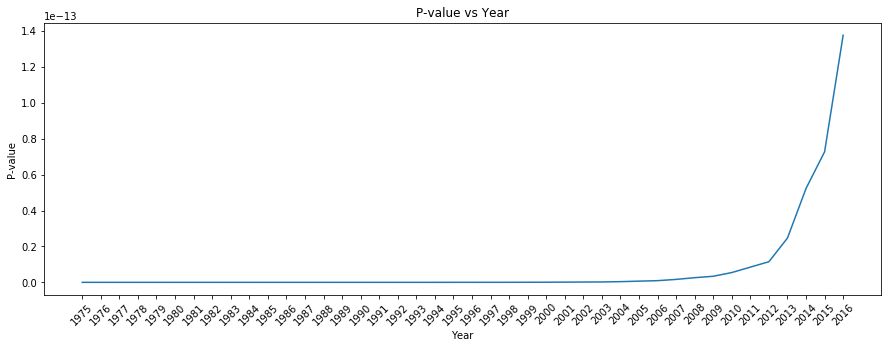

In [6]:
# Plot the p value per year
plt.figure(figsize = (15,5))
plt.plot(years, p_values)
plt.xticks(rotation=45)
plt.title("P-value vs Year")
plt.ylabel("P-value")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

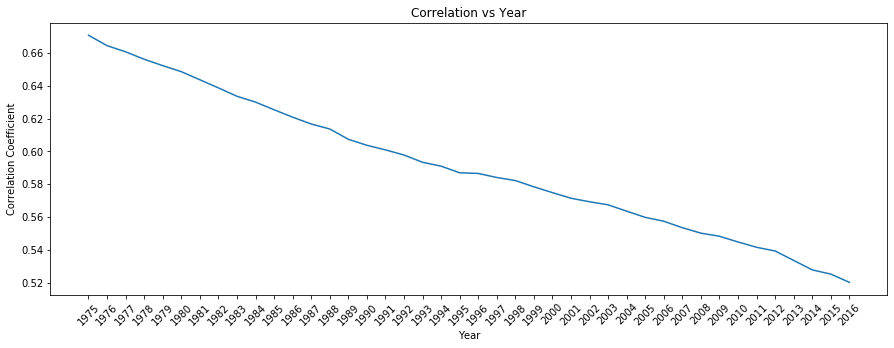

In [7]:
# Plot the correlation value per year
plt.figure(figsize = (15,5))
plt.plot(years, coeffs)
plt.xticks(rotation=45)
plt.title("Correlation vs Year")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Year")

In [8]:
# Get the index of the largest coefficient index (absolute value) and the minimum p_value
max_ind_c = coeffs.index(max([abs(x) for x in coeffs]))
min_ind_p = p_values.index(min(p_values))

print(f"The strongest correlation occurs in the year {years[max_ind_c]}, with a correlation index of {coeffs[max_ind_c]}")
print(f"The most significant correlation occurs in the year {years[min_ind_p]}, with a p-value of {p_values[min_ind_p]}")

The strongest correlation occurs in the year 1975, with a correlation index of 0.6708129246664043
The most significant correlation occurs in the year 1975, with a p-value of 2.310555059773027e-24


# Análisis

En este ejemplo, podríamos ver que el índice de masa corporal siempre está positivamente correlacionado con la expectativa de vida. Esto significa que entre mayor es el índice de masa corporal de un país, más años vive la gente de ese país (aunque para este ejemplo considero que sería mucho mas útil tener el porcentaje de sobrepeso y obesidad, para tener resultados que tengan más sentido).

La mayor correlación ocurre en 1975, lo cual implica que los efectos del peso sobre la expectativa de vida se observan más a largo plazo.

Una vez hecho este análisis para todos los factores que decidamos incluir, podemos comparar cuáles tienen un efecto más inmediato y cuáles presentan la mayor correlación.